In [1]:
import pandas as pd


In [2]:
import pandas as pd


In [3]:
import pandas as pd


In [6]:
Sig_Eqs=pd.read_csv("earthquakes-2023-10-31_10-41-39_+0800.tsv", sep='\t',header=0,index_col='Id')
Sig_Eqs=Sig_Eqs.drop(columns='Search Parameters')
Sig_Eqs.dropna(1)
Sig_Eqs=Sig_Eqs.drop(index=np.nan)

C:\Users\zyg\AppData\Local\Temp\ipykernel_21632\1682890687.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  Sig_Eqs.dropna(1)


In [7]:
Sig_Eqs

Year    Mo    Dy   Hr    Mn   Sec     Tsu  Vol           Country  \
Id                                                                            
1.0     -2150.0   NaN   NaN  NaN   NaN   NaN     NaN  NaN            JORDAN   
2.0     -2000.0   NaN   NaN  NaN   NaN   NaN     1.0  NaN             SYRIA   
3.0     -2000.0   NaN   NaN  NaN   NaN   NaN     NaN  NaN      TURKMENISTAN   
8.0     -1566.0   NaN   NaN  NaN   NaN   NaN     NaN  NaN            ISRAEL   
11.0    -1450.0   NaN   NaN  NaN   NaN   NaN     NaN  NaN             ITALY   
...         ...   ...   ...  ...   ...   ...     ...  ...               ...   
10710.0  2023.0  10.0  11.0  0.0  41.0  56.0     NaN  NaN       AFGHANISTAN   
10711.0  2023.0  10.0   7.0  8.0  40.0  13.0     NaN  NaN  PAPUA NEW GUINEA   
10712.0  2023.0  10.0  15.0  3.0  36.0   0.0     NaN  NaN       AFGHANISTAN   
10713.0  1563.0   5.0  27.0  NaN   NaN   NaN     NaN  NaN            MEXICO   
10714.0  1816.0  11.0  14.0  NaN   NaN   NaN  5893.0  NaN            MEXICO   

        Area  ...  Total Missing Total Missing Description  Total Injuries  \
Id            ...                                                            
1.0      NaN  ...            NaN                       NaN             NaN   
2.0      NaN  ...            NaN                       NaN             NaN   
3.0      NaN  ...            NaN                       NaN             NaN   
8.0      NaN  ...            NaN                       NaN             NaN   
11.0     NaN  ...            NaN                       NaN             NaN   
...      ...  ...            ...                       ...             ...   
10710.0  NaN  ...            NaN                       NaN           164.0   
10711.0  NaN  ...            NaN                       NaN             NaN   
10712.0  NaN  ...            NaN                       NaN           153.0   
10713.0  NaN  ...            NaN                       NaN             NaN   
10714.0  NaN  ...            NaN                       NaN             NaN   

         Total Injuries Description  Total Damage ($Mil)  \
Id                                                         
1.0                             NaN                  NaN   
2.0                             NaN                  NaN   
3.0                             NaN                  NaN   
8.0                             NaN                  NaN   
11.0                            NaN                  NaN   
...                             ...                  ...   
10710.0                         3.0                  NaN   
10711.0                         NaN                  NaN   
10712.0                         3.0                  NaN   
10713.0                         NaN                  NaN   
10714.0                         NaN                  NaN   

         Total Damage Description  Total Houses Destroyed  \
Id                                                          
1.0                           NaN                     NaN   
2.0                           NaN                     NaN   
3.0                           1.0                     NaN   
8.0                           NaN                     NaN   
11.0                          NaN                     NaN   
...                           ...                     ...   
10710.0                       2.0                     NaN   
10711.0                       2.0                   200.0   
10712.0                       2.0                     NaN   
10713.0                       2.0                     NaN   
10714.0                       3.0                     NaN   

         Total Houses Destroyed Description  Total Houses Damaged  \
Id                                                                  
1.0                                     NaN                   NaN   
2.0                                     NaN                   NaN   
3.0                                     1.0                   NaN   
8.0                                     NaN     

In [8]:
total_deaths = Sig_Eqs.groupby('Country')['Deaths'].sum()

In [9]:
sorted_death_counts = total_deaths.sort_values(ascending=False)

In [10]:
top_10_countries = sorted_death_counts.head(10)
print(top_10_countries)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


In [14]:
eq_big=Sig_Eqs.loc[Sig_Eqs['Mag']>6]

In [15]:

eq_big=eq_big.groupby('Year').size()

In [16]:
total_earthquakes = eq_big.sum()
print(f"地震次数一共有{total_earthquakes}")

地震次数一共有2944


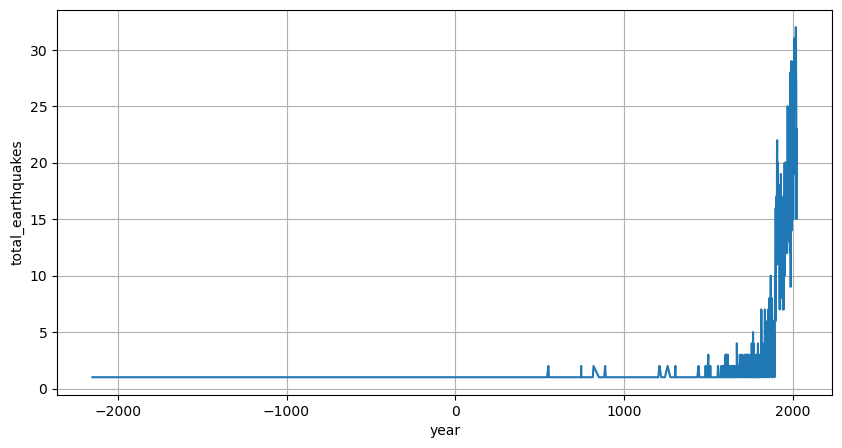

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(eq_big.index, eq_big.values)
plt.xlabel('year')
plt.ylabel('total_earthquakes')

plt.grid(True)
plt.show()

In [26]:
eq_new = pd.read_csv("earthquakes-2023-10-31_10-41-39_+0800.tsv", sep='\t', header=0, index_col='Id')
eq_new = eq_new.drop(columns='Search Parameters')
eq_new = eq_new.dropna(subset=['Country'])
eq_new.insert(0, 'eq_indexx', 1)

def CountEq_LargestEq(Country):


    every_eq = eq_new.groupby('Country')['eq_indexx'].sum()

    max_magnitude_index = eq_new.groupby('Country')['Mag'].idxmax()
    max_magnitude_index_cleaned = max_magnitude_index.dropna()

    max_earthquake_date = eq_new.loc[max_magnitude_index_cleaned, 'Year']

    if Country in every_eq.index:
        eq_count = every_eq[Country]
        if Country in max_magnitude_index_cleaned.index:
            max_earthquake_year = int(max_earthquake_date[max_earthquake_date.index == max_magnitude_index_cleaned[Country]].values[0])
            
            # 获取最大地震日期
            max_earthquake_month = eq_new.loc[max_magnitude_index_cleaned[Country], 'Mo']
            max_earthquake_day = eq_new.loc[max_magnitude_index_cleaned[Country], 'Dy']

            if not pd.isna(max_earthquake_month) and not pd.isna(max_earthquake_day):
                max_earthquake_month = int(max_earthquake_month)
                max_earthquake_day = int(max_earthquake_day)
                return (Country, eq_count, max_earthquake_year, max_earthquake_month, max_earthquake_day)
            elif not pd.isna(max_earthquake_month):
                max_earthquake_month = int(max_earthquake_month)
                return (Country, eq_count, max_earthquake_year, max_earthquake_month, None)
            else:
                return (Country, eq_count, max_earthquake_year, None, None)
        else:
            return (Country, eq_count, "Data not available", None, None)
    else:
        return None
    
    
    
    
#输入国家 SAINT LUCIA    
CountEq_LargestEq('SAINT LUCIA')


('SAINT LUCIA', 2, 'Data not available', None, None)

In [20]:
results = []

for country in eq_new['Country'].unique():
    result = CountEq_LargestEq(country)
    if result is not None:  
        results.append(result)

# 将结果整理成一个DataFrame，并按Earthquake Count降序排序
results_df = pd.DataFrame(results, columns=['Country', 'Earthquake Count', 'Max Earthquake Year', 'Max Earthquake Month', 'Max Earthquake Day'])
                         
results_df['Max Earthquake Month'] = results_df['Max Earthquake Month'].astype('Int64')  # 将月份转为整数
results_df['Max Earthquake Day'] = results_df['Max Earthquake Day'].astype('Int64')  # 将日期转为整数
results_df = results_df.sort_values('Earthquake Count', ascending=False).reset_index(drop=True)
display(results_df)


Country  Earthquake Count Max Earthquake Year  \
0                       CHINA               620                1668   
1                       JAPAN               414                2011   
2                   INDONESIA               411                2004   
3                        IRAN               384                 856   
4                      TURKEY               335                1939   
..                        ...               ...                 ...   
151  CENTRAL AFRICAN REPUBLIC                 1                1921   
152                  DJIBOUTI                 1                1989   
153                    GUINEA                 1                1983   
154                   BELGIUM                 1                1983   
155                    ZAMBIA                 1                2017   

     Max Earthquake Month  Max Earthquake Day  
0                       7                  25  
1                       3                  11  
2                      12                  26  
3                      12                  22  
4                      12                  26  
..                    ...                 ...  
151                     9                  16  
152                     8                  20  
153                    12                  22  
154                    11                   8  
155                     2                  24  

[156 rows x 5 columns]